<a href="https://www.kaggle.com/code/lalit7881/payment-fraud-detection?scriptVersionId=299169902" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digital-payment-fraud-detection/Digital_Payment_Fraud_Detection_Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/digital-payment-fraud-detection/Digital_Payment_Fraud_Detection_Dataset.csv")

In [3]:
df.head()

,transaction_id,user_id,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
0,T1,U3756,18758.28,Transfer,UPI,Web,Hyderabad,895,14,1,25535.84,0,0.718,4,0
1,T2,U7899,47538.18,Payment,Wallet,iOS,Hyderabad,918,21,0,3955.85,0,0.525,9,0
2,T3,U1765,36613.10,Payment,Card,Android,Chennai,1506,8,4,22727.71,0,0.985,9,0
3,T4,U8850,29952.99,Payment,Wallet,iOS,Chennai,800,1,3,18095.89,0,0.797,2,0
4,T5,U9049,7843.13,Payment,UPI,Web,Delhi,301,4,1,9317.49,1,0.468,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_id            7500 non-null   object 
 1   user_id                   7500 non-null   object 
 2   transaction_amount        7500 non-null   float64
 3   transaction_type          7500 non-null   object 
 4   payment_mode              7500 non-null   object 
 5   device_type               7500 non-null   object 
 6   device_location           7500 non-null   object 
 7   account_age_days          7500 non-null   int64  
 8   transaction_hour          7500 non-null   int64  
 9   previous_failed_attempts  7500 non-null   int64  
 10  avg_transaction_amount    7500 non-null   float64
 11  is_international          7500 non-null   int64  
 12  ip_risk_score             7500 non-null   float64
 13  login_attempts_last_24h   7500 non-null   int64  
 14  fraud_la

In [5]:
df.describe()

,transaction_amount,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,24813.534161,1006.904533,11.435867,2.013600,15129.061027,0.100667,0.505026,4.995067,0.065200
std,14434.742371,575.632925,6.950899,1.421578,8597.760720,0.300907,0.289647,2.593879,0.246895
min,50.580000,10.000000,0.000000,0.000000,102.790000,0.000000,0.000000,1.000000,0.000000
25%,12272.785000,502.750000,5.000000,1.000000,7725.842500,0.000000,0.257000,3.000000,0.000000
50%,24715.550000,1018.000000,11.000000,2.000000,15074.810000,0.000000,0.502000,5.000000,0.000000
75%,37288.375000,1505.000000,18.000000,3.000000,22573.062500,0.000000,0.759000,7.000000,0.000000
max,49985.900000,1999.000000,23.000000,4.000000,29994.290000,1.000000,1.000000,9.000000,1.000000


In [6]:
df.isnull().sum()

transaction_id              0
user_id                     0
transaction_amount          0
transaction_type            0
payment_mode                0
device_type                 0
device_location             0
account_age_days            0
transaction_hour            0
previous_failed_attempts    0
avg_transaction_amount      0
is_international            0
ip_risk_score               0
login_attempts_last_24h     0
fraud_label                 0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

transaction_id               object
user_id                      object
transaction_amount          float64
transaction_type             object
payment_mode                 object
device_type                  object
device_location              object
account_age_days              int64
transaction_hour              int64
previous_failed_attempts      int64
avg_transaction_amount      float64
is_international              int64
ip_risk_score               float64
login_attempts_last_24h       int64
fraud_label                   int64
dtype: object

In [9]:
df.shape

(7500, 15)

In [10]:
df.columns

Index(['transaction_id', 'user_id', 'transaction_amount', 'transaction_type',
       'payment_mode', 'device_type', 'device_location', 'account_age_days',
       'transaction_hour', 'previous_failed_attempts',
       'avg_transaction_amount', 'is_international', 'ip_risk_score',
       'login_attempts_last_24h', 'fraud_label'],
      dtype='object')

In [11]:
df.nunique()

transaction_id              7500
user_id                     5106
transaction_amount          7499
transaction_type               3
payment_mode                   4
device_type                    3
device_location                5
account_age_days            1943
transaction_hour              24
previous_failed_attempts       5
avg_transaction_amount      7498
is_international               2
ip_risk_score               1000
login_attempts_last_24h        9
fraud_label                    2
dtype: int64

## Data visualizations

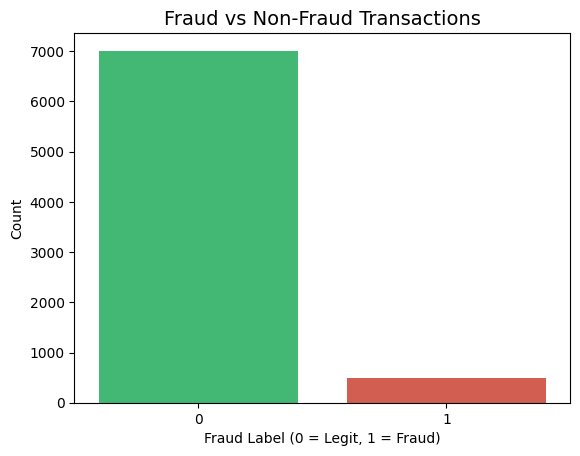

In [12]:
plt.figure()
sns.countplot(x="fraud_label", data=df, palette=["#2ecc71", "#e74c3c"])
plt.title("Fraud vs Non-Fraud Transactions", fontsize=14)
plt.xlabel("Fraud Label (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

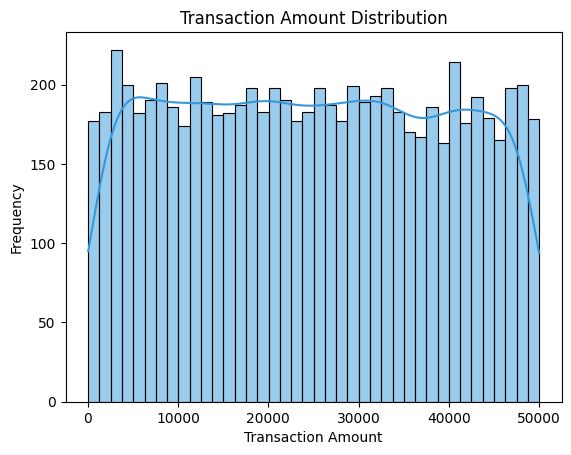

In [13]:
plt.figure()
sns.histplot(df["transaction_amount"], bins=40, color="#3498db", kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

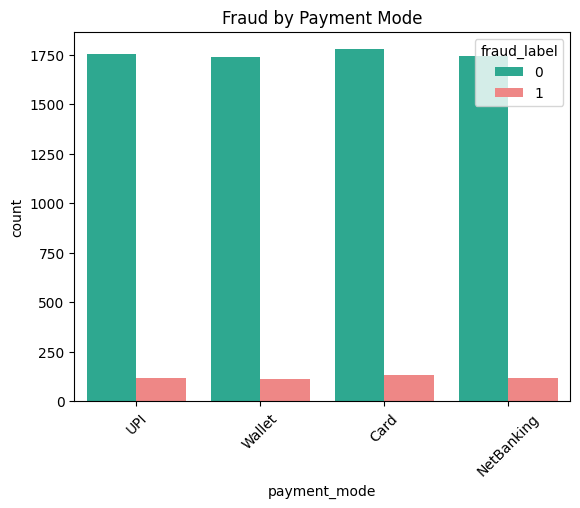

In [14]:
plt.figure()
sns.countplot(x="payment_mode", hue="fraud_label", data=df,
              palette=["#1abc9c", "#ff7675"])
plt.title("Fraud by Payment Mode")
plt.xticks(rotation=45)
plt.show()

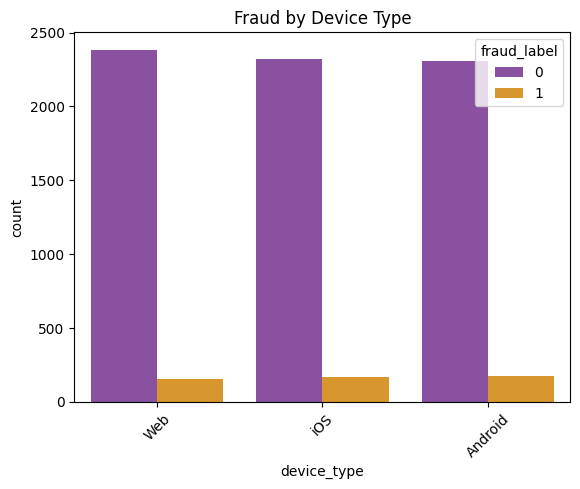

In [15]:
plt.figure()
sns.countplot(x="device_type", hue="fraud_label", data=df,
              palette=["#8e44ad", "#f39c12"])
plt.title("Fraud by Device Type")
plt.xticks(rotation=45)
plt.show()

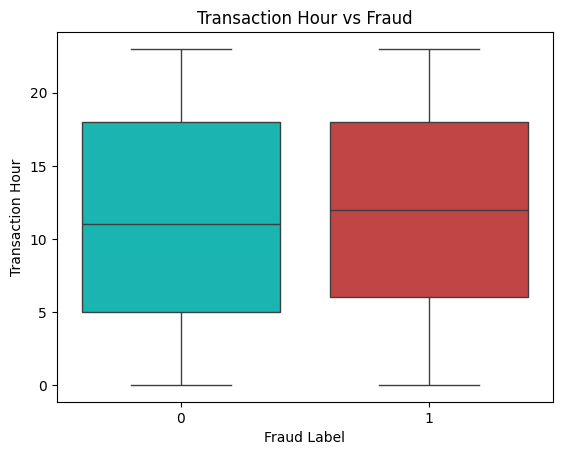

In [16]:
plt.figure()
sns.boxplot(x="fraud_label", y="transaction_hour",
            data=df, palette=["#00cec9", "#d63031"])
plt.title("Transaction Hour vs Fraud")
plt.xlabel("Fraud Label")
plt.ylabel("Transaction Hour")
plt.show()

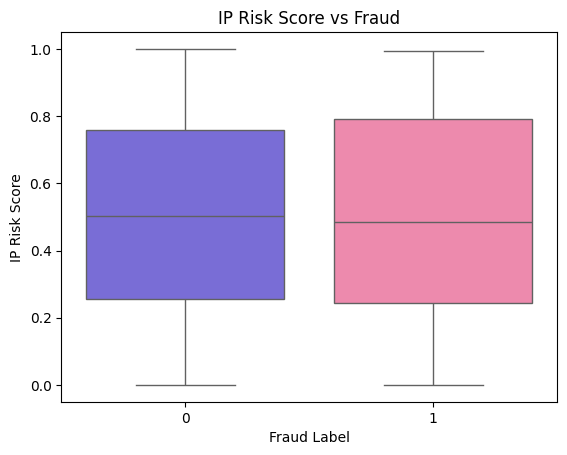

In [17]:
plt.figure()
sns.boxplot(x="fraud_label", y="ip_risk_score",
            data=df, palette=["#6c5ce7", "#fd79a8"])
plt.title("IP Risk Score vs Fraud")
plt.xlabel("Fraud Label")
plt.ylabel("IP Risk Score")
plt.show()


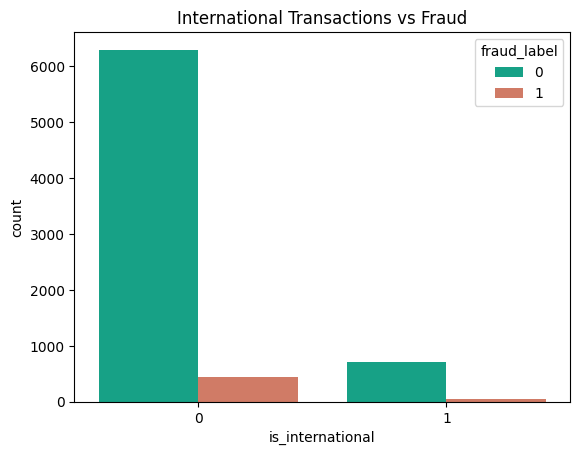

In [18]:
plt.figure()
sns.countplot(x="is_international", hue="fraud_label",
              data=df, palette=["#00b894", "#e17055"])
plt.title("International Transactions vs Fraud")
plt.show()

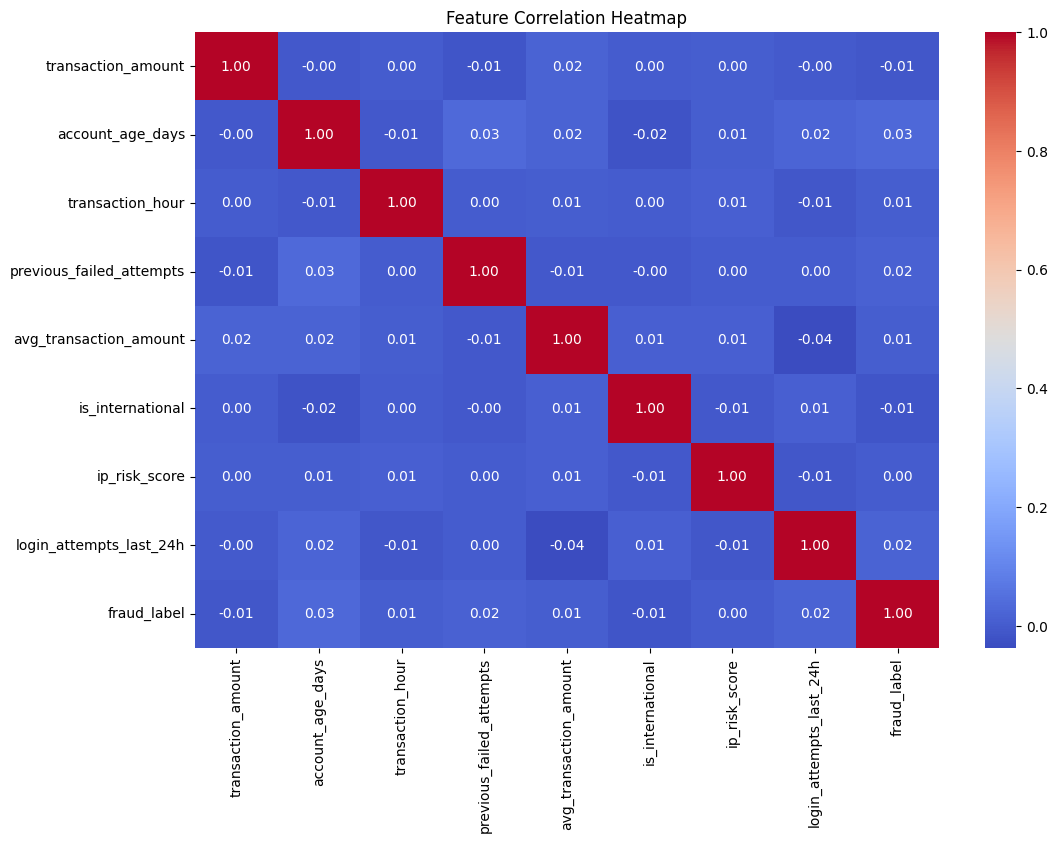

In [19]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Feature engg

In [20]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# SMOTE
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [21]:
# Drop ID columns (if present)
df = df.drop(columns=["transaction_id", "user_id"], errors="ignore")

# Encode categorical columns
categorical_cols = df.select_dtypes(include="object").columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Ensure all numeric
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna()

print("After Cleaning:")
print(df.dtypes)

After Cleaning:
transaction_amount          float64
transaction_type              int64
payment_mode                  int64
device_type                   int64
device_location               int64
account_age_days              int64
transaction_hour              int64
previous_failed_attempts      int64
avg_transaction_amount      float64
is_international              int64
ip_risk_score               float64
login_attempts_last_24h       int64
fraud_label                   int64
dtype: object


In [22]:
X = df.drop("fraud_label", axis=1)
y = df["fraud_label"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (6000, 12)
Test Shape: (1500, 12)


In [24]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())

Before SMOTE:
 fraud_label
0    5609
1     391
Name: count, dtype: int64

After SMOTE:
 fraud_label
0    5609
1    5609
Name: count, dtype: int64


In [25]:
scaler = StandardScaler()

X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=8),
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=8),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [27]:
results = []

for name, model in models.items():
    
    print(f"\n========== {name} ==========")
    
    # Scale only for specific models
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_res_scaled, y_train_res)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    
    print("Accuracy:", round(acc,4))
    print("ROC-AUC:", round(roc,4))
    print(classification_report(y_test, y_pred))
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": roc
    })


========== Logistic Regression ==========
Accuracy: 0.6453
ROC-AUC: 0.5106
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      1402
           1       0.07      0.34      0.11        98

    accuracy                           0.65      1500
   macro avg       0.50      0.50      0.44      1500
weighted avg       0.88      0.65      0.73      1500


========== Decision Tree ==========
Accuracy: 0.602
ROC-AUC: 0.531
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1402
           1       0.07      0.43      0.12        98

    accuracy                           0.60      1500
   macro avg       0.51      0.52      0.43      1500
weighted avg       0.88      0.60      0.70      1500


========== Random Forest ==========
Accuracy: 0.7587
ROC-AUC: 0.5163
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1402
           1       0.07

In [28]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Accuracy   ROC-AUC
1        Decision Tree  0.602000  0.530951
5                  KNN  0.645333  0.530801
3    Gradient Boosting  0.741333  0.528698
4                  SVM  0.768000  0.523232
2        Random Forest  0.758667  0.516296
0  Logistic Regression  0.645333  0.510561
6          Naive Bayes  0.606000  0.509389


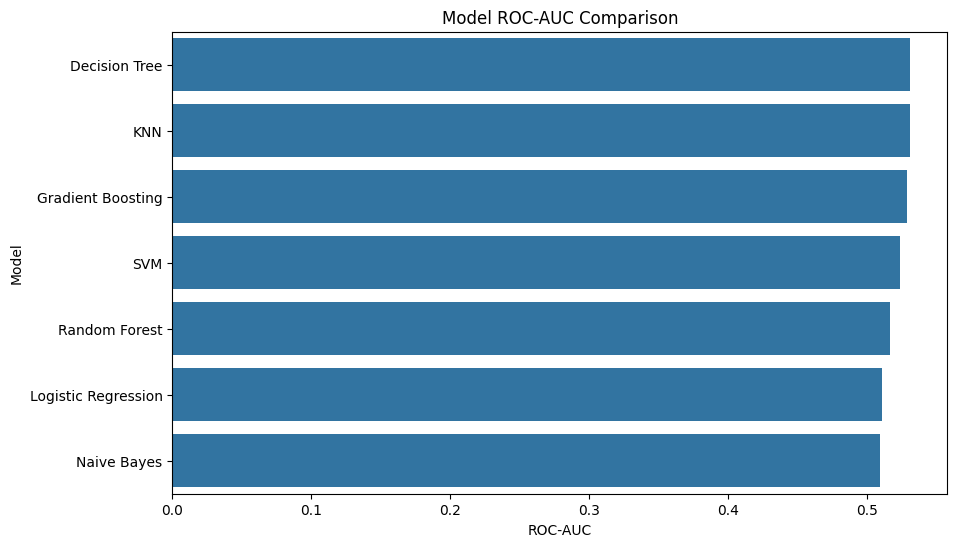

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x="ROC-AUC", y="Model", data=results_df)
plt.title("Model ROC-AUC Comparison")
plt.show()